In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/ejecicioclase 5,4')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
  
from numpy import loadtxt, sum, array, linspace, exp, arange, pi, cos, sin, sqrt, empty, log
from math import factorial, tanh, cosh
from pylab import plot, show, xlabel, ylabel, imshow, hot, xlim, ylim, gray
print('librerias')

librerias


EJERCICIO 5,4 limite de difraccion de un telescopio.

INTRODUCCION

La luz de las estrellas puede ser tratada efectivamente como procedente de una fuente puntual en el infinito. Cuando dicha luz, con longitud de onda λ, pasa a través de la abertura circular de un telescopio (asumiendo que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, produce no un solo punto, sino un patrón de difracción circular que consiste en un punto central rodeado por una serie de anillos concéntricos.

Los anillos de difracción son causados por la interacción que tienen las ondas de luz cuando atraviesan la apertura del telescopio. Según las leyes de la física, las ondas de luz, al igual que las ondas de agua o de sonido, cuando pasan a través de una abertura, ocurre una interferencia o difracción de las ondas al cruzar al otro lado, causando una serie de interferecias constructivas y destructivas de las ondas 

Primera Parte del ejercicio

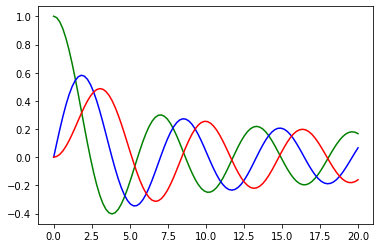

In [3]:
def J(m, x):                                                            # se definen las funciones
    def f(m, x, theta):
        return cos(m*theta - x* sin(theta))
    N = 1000                                                            # se declaran las variables
    a = 0
    b = pi
    h = (b - a) / N
    imparSum = 0
    for k in range(1, N, 2):
        imparSum += f(m, x, a + k*h)
    parSum = 0
    for k in range(1, N, 2):
        parSum += f(m, x, a + k*h)
    return 1 / pi * 1 / 3 * h * (f(m, x, a) + f(m, x, b) + 4 * imparSum + 2 * parSum)

# se grafica J0, J1, J2
puntox = linspace(0, 20, 100)
J0 = []
J1 = []
J2 = []
for x in puntox:
    J0.append(J(0, x))
    J1.append(J(1, x))
    J2.append(J(2, x))
plot(puntox, J0, "g")
plot(puntox, J1, "b")
plot(puntox, J2, "r")
show()


Segunda Parte del Ejercicio

Donde existe una intereferencia destructiva (esto es que las ondas se cancelan unas con otras) no se ven ondas, crando un vacío como las zonas oscuras (sin ondas). Donde hay una inteterferencia contructiva, las ondas se apilan unas encima de otras y se aprecian en las zonas a rayas que se dispersan en todas direcciones. Es importante notar la diferencia en intensidad de la cada serie de ondas que se ve en la apertura: la franja central de ondas es la más brillante, y según nos alejamos de ésta, las ondas se ven cada vez menos intensas. 

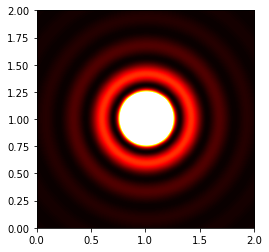

In [4]:
def r(x, y):                                                    # se definen la funciones
    return sqrt(x**2 + y**2)
def I(r):
    if (r == 0):
        return 1/4
    Lambda = 0.5                                                # En micrómetros
    kr = 2 * pi / Lambda * r
    return (J(1,kr)/ kr)**2
lado = 2                                                        # Longitud en micrómetros
puntos = 200                                                    # Número de puntos de cuadrícula en cada dirección
espaciado = lado/puntos
# se calcula la posición del centro
xCentral = lado/2
yCentral = lado/2
# se hace una matriz vacía para almacenar valores
intensidad = empty([puntos, puntos], float)
# se calcula los valores en la matriz
for i in range(puntos):
    y = espaciado * i
    for j in range(puntos):
        x = espaciado * j
        dist = r(x - xCentral, y - yCentral)
        intensidad[i, j] = I(dist)
imshow(intensidad, origin="lower", extent=[0,lado,0,lado], vmax=0.01)
hot()
show()                                                          # se realiza la grafica


Al pasar la luz estelar a través de la apertura del telescopio, las ondas de luz sufren de interferencia constructiva y destructiva.

La interferencia destructiva (cancelación de las ondas) causa los vacíos entre los anillos (regiones donde la intensidad de luz es «cero»), y la interferencia contructiva genera los anillos concéntricos que van disminuyendo en intensidad según se alejan del centro. Esta serie de intereferencias en las ondas de luz causa que sólo el 85% de la intensidad de la luz de la estrella esté concentrada en el centro luminoso, presumiendo que no hayan otras aberraciones.

Este disco central de luz es conocido como el disco de Airy. Este fenómeno óptico es el que determina la resolución de un telescopio; en otras palabras, la resolución de un telescopio es igual al tamaño del disco de Airy.